Load HyperParameters

In [1]:
from neat_src import loadHyp, updateHyp
from domain import load_task
from neat_src import DataGatherer, Neat 
from domain.config import games
from domain.task_gym import GymTask

game = games["slimevolley"]
task = GymTask(game)

hyp_default = 'p/default_neat.json'
hyp_adjust = "p/volley.json"
fileName = "volley"

hyp = loadHyp(pFileName=hyp_default, load_task=load_task)
updateHyp(hyp,load_task,hyp_adjust)

# neat = Neat(hyp)

	*** Running with hyperparameters:  p/volley.json 	***


#### Convert Policy model to Ind in Neat 

In [1]:
import json
import numpy as np
import gym, os
import slimevolleygym
import slimevolleygym.mlp as mlp
from slimevolleygym.mlp import games as games
from slimevolleygym.mlp import Model
from slimevolleygym import multiagent_rollout as rollout


# Settings
random_seed = 612
population_size = 128
total_tournaments = 500000
save_freq = 1000


# Log results
logdir = "ga_rotation_je"
if not os.path.exists(logdir):
  os.makedirs(logdir)

def mutate(param, param_count):
  return param + np.random.normal(size=param_count) * 0.1

curr_policy = Model(games['slimevolleylite'])
prev_policy = Model(games['slimevolleylite'])

/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_8210/869475039.py:26: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  curr_policy = Model(games['slimevolleylite'])
/var/folders/nn/nbsb8w3570zfgs23h2s0cdzm0000gn/T/ipykernel_8210/869475039.py:27: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  prev_policy = Model(games['slimevolleylite'])


Get mutation using Ind class, then convert back to policy model 

In [2]:
# Slime Environment Specific model -> Ind convertion function 
from neat_src import Ind, initIndiv, getNodeOrder, getLayer, LayeredWANN

temp_shapes = [(3, 1), (1, 2)] # debug getlayer functional variable 
node, conn = initIndiv(temp_shapes) # wrong, missing hidden-output connection
indiv = Ind(conn=conn, node=node)
indiv.express()

True

In [3]:
conn[1:3] # I can confirm this is correct 

array([[0., 1., 2., 4., 4., 3., 3., 3.],
       [4., 4., 4., 5., 6., 4., 5., 6.]])

In [4]:
# conn
# node

# I need a visualizer of the network 

from vis.viewInd import *

# fig, ax = viewInd(indiv, "slimevolley")
# fig.show()

taskName = "slimevolley"
env = games[taskName]
ind = indiv

wMat = ind.wMat
aVec = np.zeros((np.shape(wMat)[0]))  
print('# of Connections in ANN: ', np.sum(wMat!=0))

# Create Graph
nIn = ind.nInput + ind.nBias # fixed 
nOut= ind.nOutput
G, layer= ind2graph(wMat, nIn, nOut) # pass | G is off by one node (likely hidden node is missing?)
pos = getNodeCoord(G,layer,nIn, nOut)

# of Connections in ANN:  8


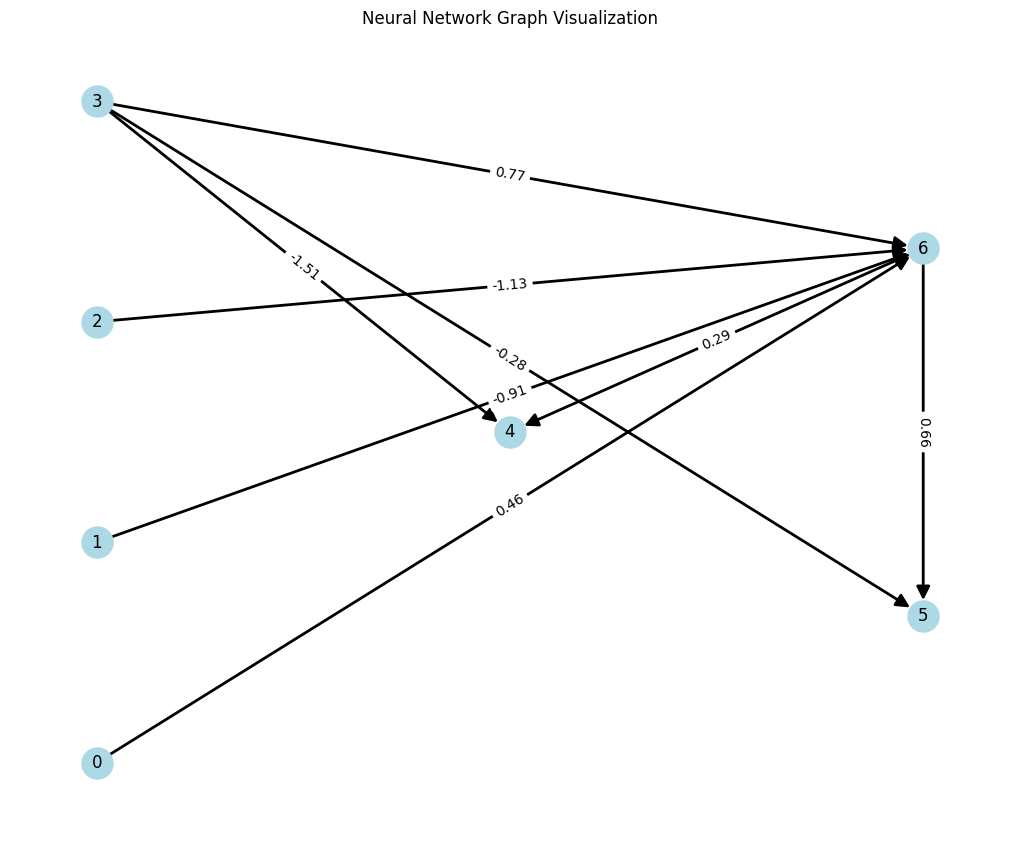

In [5]:
# visualize G please
import matplotlib.pyplot as plt
import networkx as nx

# Create figure
plt.figure(figsize=(10,8))

# Draw the network
nx.draw(G, pos,
        with_labels=True,  # Show node labels
        node_color='lightblue',
        node_size=500,
        arrowsize=20,
        width=2)

# Add edge labels (weights from wMat)
edge_labels = {}
for (u, v) in G.edges():
    edge_labels[(u,v)] = f'{wMat[u,v]:.2f}'
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.title("Neural Network Graph Visualization")
plt.show()